# Diseño y Análisis de Algoritmos INF413

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

In [1]:
from platform import python_version

print(python_version())

import time

help(time.time)

3.11.11
Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.



In [2]:
import math


def binary_search(arr, low, high, x):
  if high >= low:
    mid = (high + low) // 2
    if arr[mid] == x:
      return mid
    elif arr[mid] > x:
      return binary_search(arr, low, mid - 1, x)
    else:
      return binary_search(arr, mid + 1, high, x)
  else:
    return -1

def linear_search(arr,low, high,x):
  j=len(arr)
  for pos,a in enumerate(arr):
    if a==x:
      return pos
  return -1

In [18]:
import numpy as np

arr=sorted(np.random.randint(1e6,size=int(1e2)).tolist())

In [25]:
val=arr[len(arr)//2]

In [26]:
%%time

binary_search(arr,0,len(arr),val)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.82 µs


50

In [27]:
%%time

linear_search(arr,0,len(arr),val)

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 12.6 µs


50

# Costo Lineal

El costo constante se refiere al caso cuando el algoritmo tiene costo lineal al tamaño del problema $\mathcal{O}(n)$

In [28]:
import time
import numpy as np


time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}
problems={1e2,1e3,1e4,1e5}
methods=['binary_search','linear_search']
sample_size=1000
for m in methods:
  for p in problems:
    for i in range(sample_size):
      arr=sorted(np.random.randint(1e6,size=np.int64(p)).tolist())
      pos=np.random.randint(p)
      val=arr[pos]
      t1=time.time()
      eval(m)(arr,0,len(arr),val)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [29]:
import pandas as pd

df=pd.DataFrame(time_data,columns=time_data.keys())

In [30]:
df['problem_size']=df['problem_size'].astype('int64')

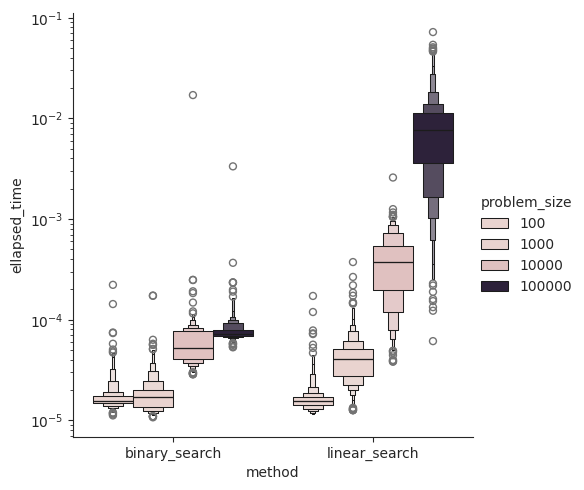

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

sns.catplot(data=df, x="method", y="ellapsed_time", hue="problem_size", kind="boxen",log_scale=(False,True))


In [39]:
df.groupby(['method','problem_size']).mean()

ellapsed_time
method        problem_size               
binary_search 100                0.000017
              1000               0.000019
              10000              0.000076
              100000             0.000081
linear_search 100                0.000017
              1000               0.000043
              10000              0.000407
              100000             0.008623

Primero comprobamos que para un mismo tamaño de entrada, ambos metodos entregan resultados diferentes de tiempo de ejecucion

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:

    1.) Comparar las medias de cada poblacion.
    2.) Ajustar curvas lineales y cuadraticas para cada algoritmo.
